In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving QCOM.csv to QCOM (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['QCOM.csv']))
df

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$132.89,6717243,$135.105,$135.35,$132.79
1,06/08/2021,$134.2,9657889,$134.06,$135.3895,$133
2,06/07/2021,$133.32,5563253,$133.7,$133.77,$132.64
3,06/04/2021,$134.34,7416675,$132.525,$135.05,$132.2
4,06/03/2021,$131.78,6643997,$132.65,$133.39,$131.42
...,...,...,...,...,...,...
2511,06/16/2011,$52.99,19440800,$54.12,$54.21,$52.42
2512,06/15/2011,$54.1,16748740,$55.23,$55.56,$53.8
2513,06/14/2011,$55.58,11995730,$54.87,$55.87,$54.75
2514,06/13/2011,$54.4,10670650,$54.79,$54.89,$54.24


In [ ]:
df.rename(columns = {'Close/Last':'Close'}, inplace = True)

In [ ]:
df.Date=pd.to_datetime(df.Date)
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df['Date']

0      2021-06-09
1      2021-06-08
2      2021-06-07
3      2021-06-04
4      2021-06-03
          ...    
2511   2011-06-16
2512   2011-06-15
2513   2011-06-14
2514   2011-06-13
2515   2011-06-10
Name: Date, Length: 2516, dtype: datetime64[ns]

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2021-06-09,$132.89,6717243,$135.105,$135.35,$132.79
1,2021-06-08,$134.2,9657889,$134.06,$135.3895,$133
2,2021-06-07,$133.32,5563253,$133.7,$133.77,$132.64
3,2021-06-04,$134.34,7416675,$132.525,$135.05,$132.2
4,2021-06-03,$131.78,6643997,$132.65,$133.39,$131.42


In [ ]:
df.sort_values('Date', inplace=True)

In [ ]:
df

,Date,Close,Volume,Open,High,Low
2515,2011-06-10,$54.6,14524760,$55.7,$55.74,$54.355
2514,2011-06-13,$54.4,10670650,$54.79,$54.89,$54.24
2513,2011-06-14,$55.58,11995730,$54.87,$55.87,$54.75
2512,2011-06-15,$54.1,16748740,$55.23,$55.56,$53.8
2511,2011-06-16,$52.99,19440800,$54.12,$54.21,$52.42
...,...,...,...,...,...,...
4,2021-06-03,$131.78,6643997,$132.65,$133.39,$131.42
3,2021-06-04,$134.34,7416675,$132.525,$135.05,$132.2
2,2021-06-07,$133.32,5563253,$133.7,$133.77,$132.64
1,2021-06-08,$134.2,9657889,$134.06,$135.3895,$133


In [ ]:
df.reset_index()

,index,Date,Close,Volume,Open,High,Low
0,2515,2011-06-10,$54.6,14524760,$55.7,$55.74,$54.355
1,2514,2011-06-13,$54.4,10670650,$54.79,$54.89,$54.24
2,2513,2011-06-14,$55.58,11995730,$54.87,$55.87,$54.75
3,2512,2011-06-15,$54.1,16748740,$55.23,$55.56,$53.8
4,2511,2011-06-16,$52.99,19440800,$54.12,$54.21,$52.42
...,...,...,...,...,...,...,...
2511,4,2021-06-03,$131.78,6643997,$132.65,$133.39,$131.42
2512,3,2021-06-04,$134.34,7416675,$132.525,$135.05,$132.2
2513,2,2021-06-07,$133.32,5563253,$133.7,$133.77,$132.64
2514,1,2021-06-08,$134.2,9657889,$134.06,$135.3895,$133


In [ ]:
df.dtypes

Date      datetime64[ns]
Close             object
Volume             int64
Open              object
High              object
Low               object
dtype: object

In [ ]:
df.Close=df.Close.str.replace('$', ' ')
df.Open=df.Open.str.replace('$', ' ')
df.High=df.High.str.replace('$', ' ')
df.Low=df.Low.str.replace('$', ' ')

In [ ]:
df[['Close','Open','High','Low']]=df[['Close','Open','High','Low']].apply(pd.to_numeric)

<function matplotlib.pyplot.show>

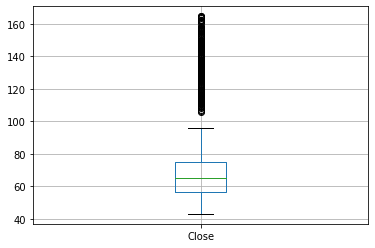

In [ ]:
df.boxplot(column='Close')
plt.show

<function matplotlib.pyplot.show>

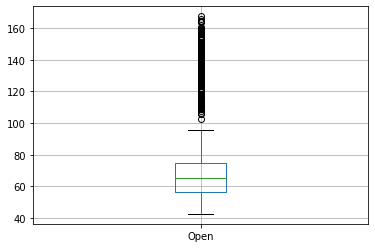

In [ ]:
df.boxplot(column='Open')
plt.show

<function matplotlib.pyplot.show>

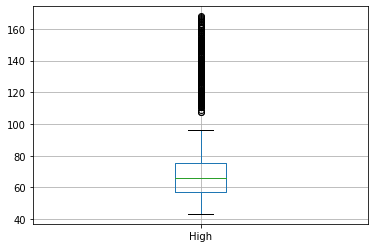

In [ ]:
df.boxplot(column='High')
plt.show

<function matplotlib.pyplot.show>

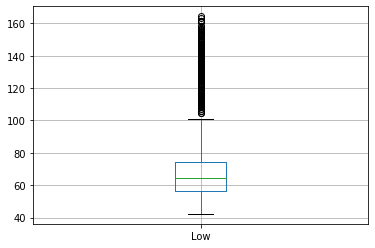

In [ ]:
df.boxplot(column='Low')
plt.show

<function matplotlib.pyplot.show>

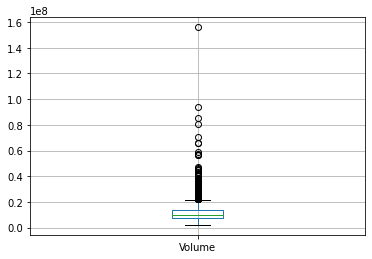

In [ ]:
df.boxplot(column='Volume')
plt.show

In [ ]:
def remove_outliners(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  l_range= Q1-(1.5*IQR)
  u_range= Q3+(1.5*IQR)
  return l_range,u_range

In [ ]:
x,y=remove_outliners(df['Volume'])
df['Volume']=np.where(df['Volume']>y, y, df['Volume'])
df['Volume']=np.where(df['Volume']<x, x, df['Volume'])

<function matplotlib.pyplot.show>

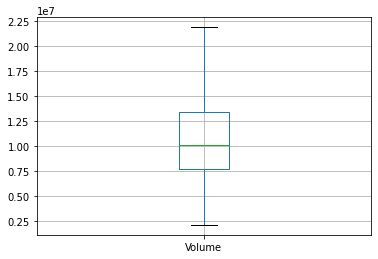

In [ ]:
df.boxplot(column='Volume')
plt.show

In [ ]:
x,y=remove_outliners(df['High'])
df['High']=np.where(df['High']>y, y, df['High'])
df['High']=np.where(df['High']<x, x, df['High'])

In [ ]:
x,y=remove_outliners(df['Low'])
df['Low']=np.where(df['Low']>y, y, df['Low'])
df['Low']=np.where(df['Low']<x, x, df['Low'])

In [ ]:
x,y=remove_outliners(df['Open'])
df['Open']=np.where(df['Open']>y, y, df['Open'])
df['Open']=np.where(df['Open']<x, x, df['Open'])

In [ ]:
x,y=remove_outliners(df['Close'])
df['Close']=np.where(df['Close']>y, y, df['Close'])
df['Close']=np.where(df['Close']<x, x, df['Close'])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving filterQCOM_Totalheadlines_years.csv to filterQCOM_Totalheadlines_years (1).csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['filterQCOM_Totalheadlines_years.csv']))
df1

,Date,Headlines
0,02-01-2015,What to expect from Apple in 2015 beyond its s...
1,09-01-2015,Samsung is reportedly making a secret new chip...
2,20-01-2015,It Will Be Apple Watch Vs HTC Smart Watch In M...
3,21-01-2015,Samsung Electronics Co Ltd still pursuing Blac...
4,28-01-2015,Apple Inc. Readies Its New Music Service to Ch...
...,...,...
731,21-05-2021,Apple App Store profits look &quot;disproporti...
732,06-06-2021,Facebook&quot;s Trump ban will last at least 2...
733,10-06-2021,Apple announcements at WWDC show augmented rea...
734,14-06-2021,"Cramer's Mad Money Recap: FAANG, Microsoft, Pa..."


In [ ]:
df1.Date=pd.to_datetime(df1.Date)
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y%m%d')
df1['Date']

0     2015-02-01
1     2015-09-01
2     2015-01-20
3     2015-01-21
4     2015-01-28
         ...    
731   2021-05-21
732   2021-06-06
733   2021-10-06
734   2021-06-14
735   2021-06-16
Name: Date, Length: 736, dtype: datetime64[ns]

In [ ]:
df1.sort_index(inplace=True)

In [ ]:
df1.sort_values('Date', inplace=True)

In [ ]:
df1

,Date,Headlines
2,2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...
3,2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...
4,2015-01-28,Apple Inc. Readies Its New Music Service to Ch...
5,2015-01-29,The feature film that blew away everyone at S...
6,2015-01-30,Samsung Group (SSNLF) To Mantain Delicate Bala...
...,...,...
727,2021-10-05,Apple Faces U.K. Class Action for Overcharging...
733,2021-10-06,Apple announcements at WWDC show augmented rea...
719,2021-11-03,Go listen to Spotify&quot;s podcast about itse...
728,2021-11-05,In Court today Apple Defended the App Store&qu...


In [ ]:
df1.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [ ]:
duplicate=df1.duplicated()
print(duplicate.sum())
df1[duplicate]

9


,Date,Headlines
616,2019-04-11,Google (GOOGL) Enters Wearables Race by Acquir...
605,2019-05-11,Buffett&quot;s Cash Mystery: Morgan Stanley Fi...
608,2019-08-11,The free Roku app on Apple Watch is now availa...
609,2019-11-11,"Apple Is Extremely Overvalued, But Likely To G..."
611,2019-11-19,Apple Partners with the Non-Profit &quot;100ca...
612,2019-11-23,Should Apple Take a Cue from PayPal&quot;s Acq...
625,2019-11-26,3 Retail Stocks to Consider Buying During the ...
626,2019-11-29,UPDATE 1-Apple &quot;taking a deeper look&quot...
627,2019-11-30,"Cyber Monday 2019 iPhone Deals: Amazon, Best B..."


In [ ]:
df1 = df1.drop_duplicates()
df1

,Date,Headlines
2,2015-01-20,It Will Be Apple Watch Vs HTC Smart Watch In M...
3,2015-01-21,Samsung Electronics Co Ltd still pursuing Blac...
4,2015-01-28,Apple Inc. Readies Its New Music Service to Ch...
5,2015-01-29,The feature film that blew away everyone at S...
6,2015-01-30,Samsung Group (SSNLF) To Mantain Delicate Bala...
...,...,...
727,2021-10-05,Apple Faces U.K. Class Action for Overcharging...
733,2021-10-06,Apple announcements at WWDC show augmented rea...
719,2021-11-03,Go listen to Spotify&quot;s podcast about itse...
728,2021-11-05,In Court today Apple Defended the App Store&qu...


In [ ]:
data = pd.merge(df,df1, how='inner', on=['Date'])

In [ ]:
data

,Date,Close,Volume,Open,High,Low,Headlines
0,2015-01-20,72.48000,1.172556e+07,71.75,73.21000,71.180000,It Will Be Apple Watch Vs HTC Smart Watch In M...
1,2015-01-21,71.59000,1.699024e+07,70.28,72.61000,69.950000,Samsung Electronics Co Ltd still pursuing Blac...
2,2015-01-28,70.99000,1.557841e+07,72.50,72.50000,70.850000,Apple Inc. Readies Its New Music Service to Ch...
3,2015-01-29,63.69000,2.185673e+07,65.51,65.69000,62.470000,The feature film that blew away everyone at S...
4,2015-01-30,62.46000,2.185673e+07,63.04,64.01000,62.390000,Samsung Group (SSNLF) To Mantain Delicate Bala...
...,...,...,...,...,...,...,...
574,2021-04-28,101.96875,1.311814e+07,102.16,103.00125,101.084012,Apple profit soars in latest quarter on higher...
575,2021-04-29,101.96875,2.050214e+07,102.16,103.00125,101.084012,"Apple (NASDAQ:AAPL) Posts Earnings Results, B..."
576,2021-05-03,101.96875,7.920307e+06,102.16,103.00125,101.084012,2 Cheap Stocks Under $25 to Buy that Shrugged ...
577,2021-05-14,101.96875,9.391122e+06,102.16,103.00125,101.084012,"US stocks surge in recovery; dollar, bond yiel..."


In [ ]:
#make all the headlines into a single string
sentences = data['Headlines'].tolist()
sentences

['It Will Be Apple Watch Vs HTC Smart Watch In March Apple Inc. Granted Visual Control Tech Patent For iOS, Mac Wall street finish with modest gains on tech stocks Microsoft to roll out Windows 10 as it jostles with Google and Apple How many iPads did Apple sell last quarter? Apple&quot;s plan for iPad in an iPhone world Apple and Yahoo! Pull Stocks Higher as Oil Plummets Again Top 5 Latest Apps For Your Apple (AAPL) iPhone Market News: Apple, Micron Technology, Smith & Wesson Holding Apple likely to give March quarter guidance below views Stocks End Day in Green as Tech Names Distract From Oil&quot;s Slide Former Apple employee reveals that he sneaked iconic boot up chime into Macintosh BlackBerry and Samsung are in talks after all - just not about a takeover Microsoft Takes a Step Down the Mobile Path Apple Maybe Planning to Introduce 12 inches iPad Pro? Google Changes Course, Signs Student Data Privacy Pledge Google Changes Course, Signs Student Data Privacy Pledge Google Changes Co

In [ ]:
len(sentences)

579

In [ ]:
sentences_as_one_string= " ".join(sentences)

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def headline_cleaning(headline):
    Test_punc_removed = [char for char in headline if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
headliness_clean= data['Headlines'].apply(headline_cleaning)

In [ ]:
print(headliness_clean[22]) # show the cleaned up version of index 22 headline

['Apple', 'iPad', 'Pro', 'aims', 'tap', 'enterprise', 'tablet', 'market', 'Facebook', 'Q3', 'Capital', 'Spending', 'Surges', 'Apple', 'Slips', 'Intel', '4', 'Strong', 'Value', 'Stocks', 'Tech', 'Sector', 'Apple', '2016', 'predictions', 'Streaming', 'TV', 'service', 'car', 'investments', 'Apple', 'Pay', 'Work', 'Buy', 'Apple', 'Stock', 'Right', 'Herequots', 'Decide', 'One', 'week', 'new', 'Apple', 'TV', 'Siri', 'Apple', 'iPad', 'Pro', 'aims', 'tap', 'enterprise', 'tablet', 'market', 'Apple', 'Starts', 'Selling', 'iPad', 'Pro', 'Week', 'Eddy', 'Cue', 'Talks', 'Apple', 'TV', 'CNN', 'Tim', 'Cook', 'Visits', 'Touchpress', 'Develops', 'Apps', 'Apple', 'TV', 'amp', 'iPad', 'Pro', 'Apple', 'Stock', 'Rating', 'Reaffirmed', 'FBR', 'Co', 'AAPL', 'Apple', 'sets', 'iPad', 'Pro', 'launch', 'seeks', 'serious', 'crowd', 'Arnault', 'Biver', 'Unveil', 'Tag', 'Heuer', 'Connected', 'Watch', 'YouTube', 'Red', 'Gives', 'Alphabet', 'Big', 'Advantage', 'Spotify', 'Apple', 'Music', 'Targetquots', 'Black', 'Fri

In [ ]:
print(data['Headlines'][22]) #original verssion

Apple iPad Pro aims to tap enterprise tablet market Facebook Q3 Capital Spending Surges, Apple Slips Intel and 4 Strong Value Stocks in the Tech Sector Apple 2016 predictions: Streaming TV service, car investments How Does Apple Pay Work? Should You Buy Apple Stock Right Now? Here&quot;s How to Decide One week with the new Apple TV and Siri Apple iPad Pro aims to tap enterprise tablet market Apple Starts Selling the iPad Pro this Week Eddy Cue Talks up Apple TV with CNN While Tim Cook Visits Touchpress who Develops Apps for Apple TV &amp; the iPad Pro Apple Stock Rating Reaffirmed by FBR & Co. (AAPL) Apple sets iPad Pro launch as it seeks a more serious crowd Arnault, Biver Unveil Tag Heuer Connected Watch YouTube Red Gives Alphabet a Big Advantage Over Spotify and Apple Music Target&quot;s Black Friday deals for 2015 include iPads, Apple Watch, and Beats headphones How Durham-based Quintiles contributed to Apple&quot;s ResearchKit Apple Is Buying Back Shares Like There&quot;s No Tomor

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(analyzer = headline_cleaning)
headline_countvectorizer = vectorizer.fit_transform(data['Headlines']).toarray()

In [ ]:
headline_countvectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
headline_countvectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from textblob import TextBlob

In [ ]:
def sub(x):
  return TextBlob(x).sentiment.subjectivity

In [ ]:
def pol(x):
  return TextBlob(x).sentiment.polarity

In [ ]:
import unicodedata

# instantiating the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# calculating sentiment scores
data['compound'] = data['Headlines'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['negative'] = data['Headlines'].apply(lambda x: sia.polarity_scores(x)['neg'])
data['neutral'] = data['Headlines'].apply(lambda x: sia.polarity_scores(x)['neu'])
data['positive'] = data['Headlines'].apply(lambda x: sia.polarity_scores(x)['pos'])

In [ ]:
data['subjectivity']=data['Headlines'].apply(sub)
data['ploarity']=data['Headlines'].apply(pol)

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
positive sentiment : (compound score >= 0.05) 
neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
negative sentiment : (compound score <= -0.05)

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]

In [ ]:
data

,Date,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive,subjectivity,ploarity
0,2015-01-20,72.48000,1.172556e+07,71.75,73.21000,71.180000,It Will Be Apple Watch Vs HTC Smart Watch In M...,0.8979,0.067,0.851,0.082,0.474682,0.063719
1,2015-01-21,71.59000,1.699024e+07,70.28,72.61000,69.950000,Samsung Electronics Co Ltd still pursuing Blac...,0.9905,0.031,0.871,0.098,0.403409,0.057221
2,2015-01-28,70.99000,1.557841e+07,72.50,72.50000,70.850000,Apple Inc. Readies Its New Music Service to Ch...,0.9984,0.031,0.834,0.135,0.453477,0.146871
3,2015-01-29,63.69000,2.185673e+07,65.51,65.69000,62.470000,The feature film that blew away everyone at S...,0.9945,0.048,0.845,0.108,0.422359,0.155346
4,2015-01-30,62.46000,2.185673e+07,63.04,64.01000,62.390000,Samsung Group (SSNLF) To Mantain Delicate Bala...,0.9962,0.050,0.800,0.150,0.386900,0.079575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2021-04-28,101.96875,1.311814e+07,102.16,103.00125,101.084012,Apple profit soars in latest quarter on higher...,0.9988,0.043,0.822,0.134,0.454010,0.190199
575,2021-04-29,101.96875,2.050214e+07,102.16,103.00125,101.084012,"Apple (NASDAQ:AAPL) Posts Earnings Results, B...",0.9980,0.065,0.810,0.125,0.427754,0.173369
576,2021-05-03,101.96875,7.920307e+06,102.16,103.00125,101.084012,2 Cheap Stocks Under $25 to Buy that Shrugged ...,0.9926,0.039,0.850,0.111,0.310558,0.090005
577,2021-05-14,101.96875,9.391122e+06,102.16,103.00125,101.084012,"US stocks surge in recovery; dollar, bond yiel...",0.9877,0.075,0.822,0.103,0.412379,0.151042


In [ ]:
data.set_index("Date", inplace = True)
data.head()

,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive,subjectivity,ploarity
Date,,,,,,,,,,,,
2015-01-20,72.48,1.172556e+07,71.75,73.21,71.18,It Will Be Apple Watch Vs HTC Smart Watch In M...,0.8979,0.067,0.851,0.082,0.474682,0.063719
2015-01-21,71.59,1.699024e+07,70.28,72.61,69.95,Samsung Electronics Co Ltd still pursuing Blac...,0.9905,0.031,0.871,0.098,0.403409,0.057221
2015-01-28,70.99,1.557841e+07,72.50,72.50,70.85,Apple Inc. Readies Its New Music Service to Ch...,0.9984,0.031,0.834,0.135,0.453477,0.146871
2015-01-29,63.69,2.185673e+07,65.51,65.69,62.47,The feature film that blew away everyone at S...,0.9945,0.048,0.845,0.108,0.422359,0.155346
2015-01-30,62.46,2.185673e+07,63.04,64.01,62.39,Samsung Group (SSNLF) To Mantain Delicate Bala...,0.9962,0.050,0.800,0.150,0.386900,0.079575


In [ ]:
data.sort_index(ascending=True,inplace=True)
data.head()

,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive,subjectivity,ploarity
Date,,,,,,,,,,,,
2015-01-20,72.48,1.172556e+07,71.75,73.21,71.18,It Will Be Apple Watch Vs HTC Smart Watch In M...,0.8979,0.067,0.851,0.082,0.474682,0.063719
2015-01-21,71.59,1.699024e+07,70.28,72.61,69.95,Samsung Electronics Co Ltd still pursuing Blac...,0.9905,0.031,0.871,0.098,0.403409,0.057221
2015-01-28,70.99,1.557841e+07,72.50,72.50,70.85,Apple Inc. Readies Its New Music Service to Ch...,0.9984,0.031,0.834,0.135,0.453477,0.146871
2015-01-29,63.69,2.185673e+07,65.51,65.69,62.47,The feature film that blew away everyone at S...,0.9945,0.048,0.845,0.108,0.422359,0.155346
2015-01-30,62.46,2.185673e+07,63.04,64.01,62.39,Samsung Group (SSNLF) To Mantain Delicate Bala...,0.9962,0.050,0.800,0.150,0.386900,0.079575


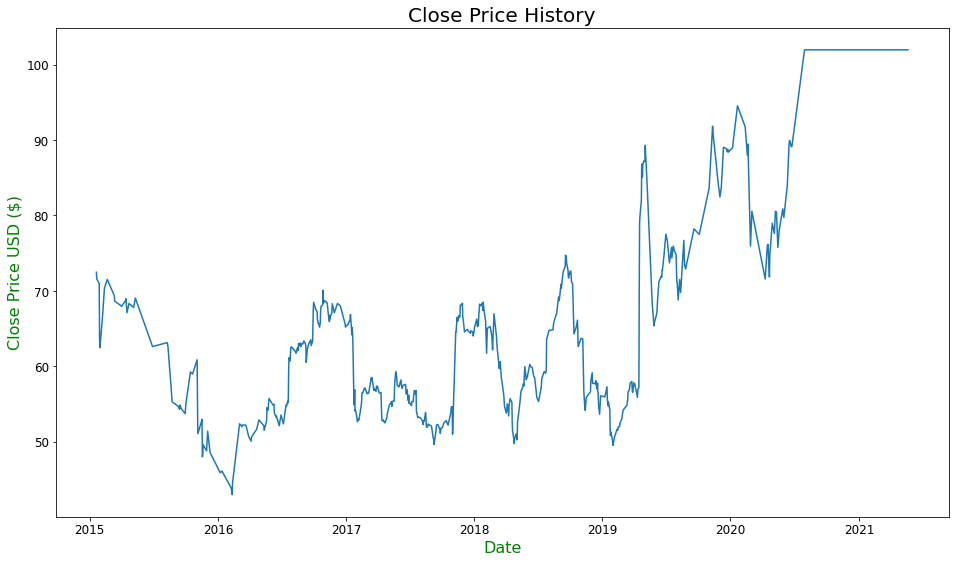

In [ ]:
# Visualizing the closing price history
plt.figure(figsize=(16,9))
plt.title('Close Price History', fontsize = 20)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
data.drop('Headlines', inplace=True, axis=1)

In [ ]:
data

,Close,Volume,Open,High,Low,compound,negative,neutral,positive,subjectivity,ploarity
Date,,,,,,,,,,,
2015-01-20,72.48000,1.172556e+07,71.75,73.21000,71.180000,0.8979,0.067,0.851,0.082,0.474682,0.063719
2015-01-21,71.59000,1.699024e+07,70.28,72.61000,69.950000,0.9905,0.031,0.871,0.098,0.403409,0.057221
2015-01-28,70.99000,1.557841e+07,72.50,72.50000,70.850000,0.9984,0.031,0.834,0.135,0.453477,0.146871
2015-01-29,63.69000,2.185673e+07,65.51,65.69000,62.470000,0.9945,0.048,0.845,0.108,0.422359,0.155346
2015-01-30,62.46000,2.185673e+07,63.04,64.01000,62.390000,0.9962,0.050,0.800,0.150,0.386900,0.079575
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-28,101.96875,1.311814e+07,102.16,103.00125,101.084012,0.9988,0.043,0.822,0.134,0.454010,0.190199
2021-04-29,101.96875,2.050214e+07,102.16,103.00125,101.084012,0.9980,0.065,0.810,0.125,0.427754,0.173369
2021-05-03,101.96875,7.920307e+06,102.16,103.00125,101.084012,0.9926,0.039,0.850,0.111,0.310558,0.090005


In [ ]:
data.isnull().sum()

Close           0
Volume          0
Open            0
High            0
Low             0
compound        0
negative        0
neutral         0
positive        0
subjectivity    0
ploarity        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
data_X = data.loc[:,data.columns !=  'Close' ]
data_Y = data['Close']
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.2)
print('\n\nTraining Set')
print(train_X.head())
print(train_y.head())



Training Set
                Volume   Open    High  ...  positive  subjectivity  ploarity
Date                                   ...                                  
2018-09-25  20712780.0  72.64  73.570  ...     0.123      0.507320  0.243961
2016-09-12  10134790.0  60.23  62.270  ...     0.093      0.482903  0.105913
2016-07-14   6586969.0  55.19  55.365  ...     0.097      0.236300  0.081066
2018-01-24  12376750.0  68.20  68.285  ...     0.091      0.496768  0.202680
2018-01-18   6788361.0  67.75  68.180  ...     0.048      0.382294  0.049230

[5 rows x 10 columns]
Date
2018-09-25    72.74
2016-09-12    62.25
2016-07-14    54.88
2018-01-24    67.98
2018-01-18    68.05
Name: Close, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
#Creating the Regressor
lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn import metrics  

In [ ]:
#Make Predictions and Evaluate the results
predict_y = lr.predict(test_X)
print('Prediction Score : ' , lr.score(test_X,test_y))

Prediction Score :  0.9987492471546213


In [ ]:
# Actual vs Predicted Comparision
compare = pd.DataFrame({ 'Actual': test_y, 'Predicted': predict_y})  
compare

,Actual,Predicted
Date,,
2019-03-18,56.83000,57.076010
2016-10-14,65.70000,66.151052
2021-02-17,101.96875,101.900725
2016-11-17,66.67000,66.537600
2021-04-29,101.96875,101.940299
...,...,...
2019-03-19,56.97000,57.291036
2017-09-07,50.38000,50.471583
2017-05-25,58.45000,58.719276


In [ ]:

print('Mean Absolute Error:',metrics.mean_absolute_error(test_y, predict_y)) 

Mean Absolute Error: 0.3036509921810771


Absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation. MAE takes the average of absolute errors for a group of predictions and observations as a measurement of the magnitude of errors for the entire group.

In [ ]:
graph=compare.head(10)

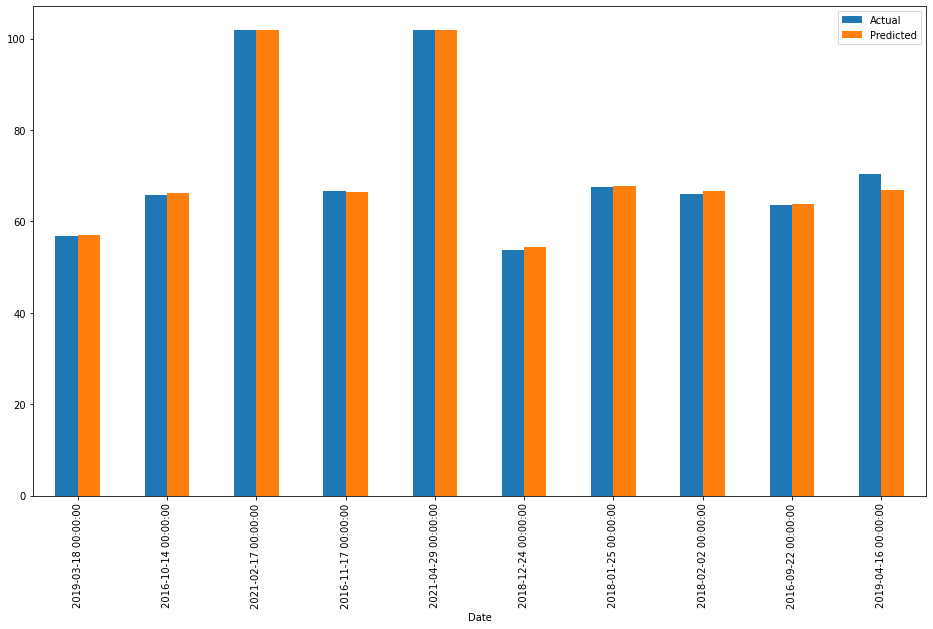

In [ ]:
graph.plot(kind='bar', figsize=(16,9))

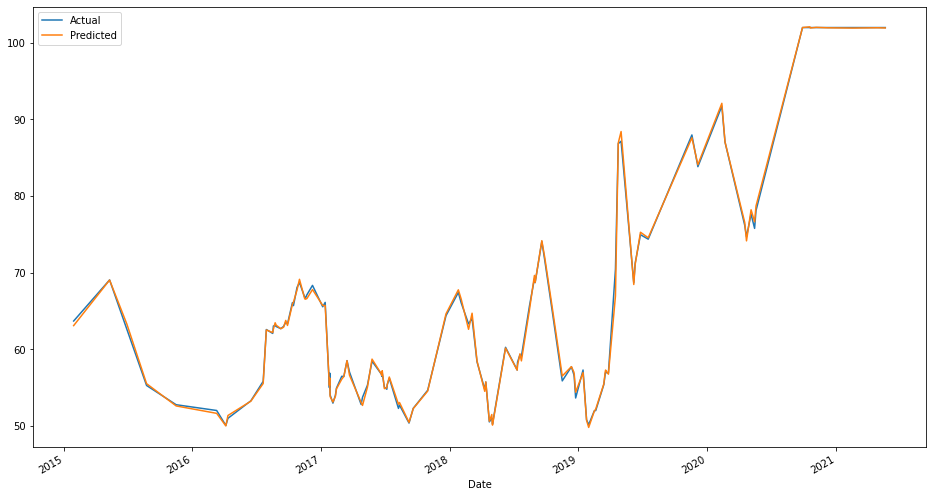

In [ ]:
lines = compare.plot.line(figsize=(16,9))